# i. Perkenalan

Nama : Akbar Fitriawan  
Batch : HCK-15

Name Dataset: heart-attack-possibility.csv
Description : Dataset ini berisi data rekam medis beberapa orang baik yang terkena serangan jantung maupun bukan disuatu rumah sakit.


Objective:

Membuat model Machine Learning untuk memprediksi kemungkinan seseorang terkena serangan jantung. Untuk meningkatkan efisiensi pelayana rumah sakit agar terindikasi serangan jantung dapat di perioritaskan


---

# ii. Import Libraries

In [106]:
# library dataframe
import pandas as pd
# library olah data numerical
import numpy as np
# library statistik
from scipy.stats import pearsonr, kendalltau, spearmanr

# Data visualisasi
import matplotlib.pyplot as plt
import seaborn as sns

# libraries Data Preprocessing
from sklearn.model_selection import train_test_split # splittingdata
from feature_engine.outliers import Winsorizer # outlier
from sklearn.preprocessing import StandardScaler, MinMaxScaler,RobustScaler # scalling
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, LabelEncoder # encoder


# Library handling outlier
from feature_engine.outliers import Winsorizer

# Pemodelan ML
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Evaluasi model
from sklearn.metrics import ConfusionMatrixDisplay, classification_report, confusion_matrix, precision_score, recall_score, f1_score,accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold

# lib counter class
from collections import Counter

# Save model
import pickle
import json

# Library to suppress warnings or deprecation notes
import warnings
warnings.filterwarnings('ignore')

---

# iii. Data Loading

In [2]:
df = pd.read_csv('heart-attack-possibility.csv')
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,Male,3,145,233,1,0,150,0,2.3,Downsloping,0.0,Fixed defect,1
1,37,Male,2,130,250,0,1,187,0,3.5,Downsloping,0.0,Normal,1
2,41,Female,1,130,204,0,0,172,0,1.4,Upsloping,0.0,Normal,1
3,56,Male,1,120,236,0,1,178,0,0.8,Upsloping,0.0,Normal,1
4,57,Female,0,120,354,0,1,163,1,0.6,Upsloping,0.0,Normal,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,Female,0,140,241,0,1,123,1,0.2,Flat,0.0,Reversible defect,0
299,45,Male,3,110,264,0,1,132,0,1.2,Flat,0.0,Reversible defect,0
300,68,Male,0,144,193,1,1,141,0,3.4,Flat,2.0,Reversible defect,0
301,57,Male,0,130,131,0,1,115,1,1.2,Flat,1.0,Reversible defect,0


In [3]:
print('Jumlah Baris: ',df.shape[0])
print('Jumlah Kolom: ',df.shape[1])

Jumlah Baris:  303
Jumlah Kolom:  14


In [4]:
# Data 5 teratas 
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,Male,3,145,233,1,0,150,0,2.3,Downsloping,0.0,Fixed defect,1
1,37,Male,2,130,250,0,1,187,0,3.5,Downsloping,0.0,Normal,1
2,41,Female,1,130,204,0,0,172,0,1.4,Upsloping,0.0,Normal,1
3,56,Male,1,120,236,0,1,178,0,0.8,Upsloping,0.0,Normal,1
4,57,Female,0,120,354,0,1,163,1,0.6,Upsloping,0.0,Normal,1


In [5]:
# Data 5 Terbawah
df.tail().T

,298,299,300,301,302
age,57,45,68,57,57
sex,Female,Male,Male,Male,Female
cp,0,3,0,0,1
trestbps,140,110,144,130,130
chol,241,264,193,131,236
fbs,0,0,1,0,0
restecg,1,1,1,1,0
thalach,123,132,141,115,174
exang,1,0,0,1,0
oldpeak,0.2,1.2,3.4,1.2,0.0


In [6]:
# Data info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    object 
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    object 
 11  ca        298 non-null    float64
 12  thal      301 non-null    object 
 13  target    303 non-null    int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 33.3+ KB


Insight:
- Dataset memiliki `303` jumlah baris dan `14` jumlah kolom
- Data type float64(2), int64(9), object(3)
- Tidak ada indikasi missing values

In [7]:
# Getting Data Info 
df.describe(include=np.number)

,age,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,ca,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,298.000000,303.000000
mean,54.366337,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,0.674497,0.544554
std,9.082101,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.938202,0.498835
min,29.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,0.000000,0.000000
50%,55.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,0.000000,1.000000
75%,61.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,1.000000,1.000000
max,77.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,1.000000


In [107]:
df.describe(include='object')

,sex,slope,thal
count,303,303,301
unique,2,3,3
top,Male,Upsloping,Normal
freq,207,142,166


Insight:

Dari hasil statistik rata-rata usia yang menjadi pasien adalah 54 tahun, dan dengan kolesterol 246. dalam situs Pen Medicine bahwa tingkat kolesterol 246 di kategorikan dengerous(bahaya). dan kebanyakan laki-laki

---

# iv. Exploratory Data Analysis (EDA)

In [9]:
# copy dataset
data_analyz = df.copy()


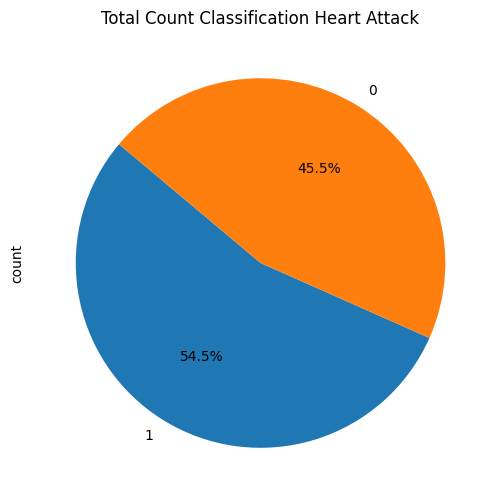

In [10]:
# Distribution Data attration employee
plt.figure(figsize=(8,6))
data_analyz.target.value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=140)
plt.title('Total Count Classification Heart Attack')
plt.show()



Dari plot di hasilkan bahwa 54% yang mengalami indikasi heart attack ketika pelayanan dan 45% yang tidak 

In [11]:
# fungsi klasifikasikan 
def filter_chol(chol):
    if chol < 200:
        return 'healthy'
    elif chol >= 200 and chol <= 240 :
        return 'at risk'
    else:
        return 'dangerous'

# Membuat kolom baru dengan hasil filter
data_analyz['class_chol'] = data_analyz['chol'].apply(filter_chol)

In [12]:
data_analyz

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,class_chol
0,63,Male,3,145,233,1,0,150,0,2.3,Downsloping,0.0,Fixed defect,1,at risk
1,37,Male,2,130,250,0,1,187,0,3.5,Downsloping,0.0,Normal,1,dangerous
2,41,Female,1,130,204,0,0,172,0,1.4,Upsloping,0.0,Normal,1,at risk
3,56,Male,1,120,236,0,1,178,0,0.8,Upsloping,0.0,Normal,1,at risk
4,57,Female,0,120,354,0,1,163,1,0.6,Upsloping,0.0,Normal,1,dangerous
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,Female,0,140,241,0,1,123,1,0.2,Flat,0.0,Reversible defect,0,dangerous
299,45,Male,3,110,264,0,1,132,0,1.2,Flat,0.0,Reversible defect,0,dangerous
300,68,Male,0,144,193,1,1,141,0,3.4,Flat,2.0,Reversible defect,0,healthy
301,57,Male,0,130,131,0,1,115,1,1.2,Flat,1.0,Reversible defect,0,healthy


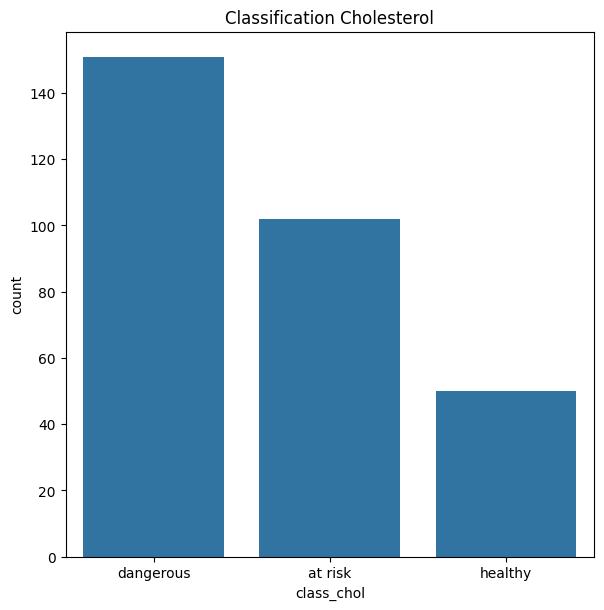

In [13]:
# visualisasi
plt.figure(figsize=(15, 15))

plt.subplot(2,2,1)
sns.countplot(x = 'class_chol',
              data = data_analyz,
              order = data_analyz['class_chol'].value_counts().index)
plt.title('Classification Cholesterol')
plt.show()

In [14]:
data_analyz['class_chol'].value_counts()

class_chol
dangerous    151
at risk      102
healthy       50
Name: count, dtype: int64

Insight:  
hasil yang di temukan bahwa kebanyakan di klasifikasikan dengerous (bahaya) sehingga rumah sakit harus memperioritskan pasien yang memiliki kolesterol tinggi

In [15]:
data_analyz.describe(include='object')

,sex,slope,thal,class_chol
count,303,303,301,303
unique,2,3,3,3
top,Male,Upsloping,Normal,dangerous
freq,207,142,166,151


dari hasil median yang mengalami heart attack memiliki kolesterol di kategorikan `class_chol` adalah `dengerous`, `male`, `Upsloping`, `Normal`

In [16]:
# Menghitung Max_Hearth_attackrate berdasarkan formula baru
data_analyz['max_heart_rate'] = (220 - data_analyz['thalach'] )

In [17]:
# Membandingkan 
mean_thalch = data_analyz['thalach'].mean()
mean_maxHeart_Rate = data_analyz['max_heart_rate'].mean()

if mean_maxHeart_Rate > mean_thalch:
    print("Formula baru kemungkinan akan menaikkan tingkat kemungkinan seseorang terkena serangan jantung dari sebelumnya.")
elif mean_maxHeart_Rate < mean_thalch:
    print("Formula baru kemungkinan akan menurunkan tingkat kemungkinan seseorang terkena serangan jantung dari sebelumnya.")
else:
    print("Formula baru tidak berpengaruh pada tingkat kenaikan gaji dari sebelumnya.")

Formula baru kemungkinan akan menurunkan tingkat kemungkinan seseorang terkena serangan jantung dari sebelumnya.


In [18]:
mean_thalch

149.64686468646866

In [19]:
mean_maxHeart_Rate

70.35313531353135

Insight : 

Berdasrkan formula baru bahwa kemungkinan akan menurunkan tingkat kemungkinan seseorang terkena serangan jantung dari sebelumnya, sehingga dapat membarikan efisiensi dokter dalam dalam menangani pasien 

---

# v. Feature Engineering

In [20]:
# dump dataset agar tidak mengulang
data = data_analyz.copy()

In [21]:
# cek duplicated data
data.duplicated().sum()

1

1 data yang terduplikat

In [22]:
data.drop_duplicates(inplace=True)

In [23]:
data.duplicated().sum()

0

In [24]:
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,class_chol,max_heart_rate
0,63,Male,3,145,233,1,0,150,0,2.3,Downsloping,0.0,Fixed defect,1,at risk,70
1,37,Male,2,130,250,0,1,187,0,3.5,Downsloping,0.0,Normal,1,dangerous,33
2,41,Female,1,130,204,0,0,172,0,1.4,Upsloping,0.0,Normal,1,at risk,48
3,56,Male,1,120,236,0,1,178,0,0.8,Upsloping,0.0,Normal,1,at risk,42
4,57,Female,0,120,354,0,1,163,1,0.6,Upsloping,0.0,Normal,1,dangerous,57
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,Female,0,140,241,0,1,123,1,0.2,Flat,0.0,Reversible defect,0,dangerous,97
299,45,Male,3,110,264,0,1,132,0,1.2,Flat,0.0,Reversible defect,0,dangerous,88
300,68,Male,0,144,193,1,1,141,0,3.4,Flat,2.0,Reversible defect,0,healthy,79
301,57,Male,0,130,131,0,1,115,1,1.2,Flat,1.0,Reversible defect,0,healthy,105


In [25]:
# drop kolom yang menurut saya tidak di perlukan max heart rate dan chole (bisa di wakilakan dengan class chol)
data.drop(columns=['chol','max_heart_rate'], axis=1,inplace=True)

In [26]:
data

,age,sex,cp,trestbps,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,class_chol
0,63,Male,3,145,1,0,150,0,2.3,Downsloping,0.0,Fixed defect,1,at risk
1,37,Male,2,130,0,1,187,0,3.5,Downsloping,0.0,Normal,1,dangerous
2,41,Female,1,130,0,0,172,0,1.4,Upsloping,0.0,Normal,1,at risk
3,56,Male,1,120,0,1,178,0,0.8,Upsloping,0.0,Normal,1,at risk
4,57,Female,0,120,0,1,163,1,0.6,Upsloping,0.0,Normal,1,dangerous
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,Female,0,140,0,1,123,1,0.2,Flat,0.0,Reversible defect,0,dangerous
299,45,Male,3,110,0,1,132,0,1.2,Flat,0.0,Reversible defect,0,dangerous
300,68,Male,0,144,1,1,141,0,3.4,Flat,2.0,Reversible defect,0,healthy
301,57,Male,0,130,0,1,115,1,1.2,Flat,1.0,Reversible defect,0,healthy


## Spliting Data

In [27]:
# split data feature dan target
X = data.drop('target', axis=1)
y = data['target']

In [28]:
# Split data Train dan Test
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [29]:
Counter(y_test)

Counter({1: 32, 0: 29})

In [30]:
Counter(y_train)

Counter({1: 132, 0: 109})

Dari hasil hitung data cukup seimbang

In [31]:
# Create function sizes chek
def print_data_sizes(X_train, y_train, X_test, y_test):
    print('Train Data')
    print('Ukuran X_train : ', X_train.shape)
    print('Ukuran y_train : ', y_train.shape)
    print('\n')
    print('Test Data')
    print('Ukuran X_test : ', X_test.shape)
    print('Ukuran y_test : ', y_test.shape)


print_data_sizes(X_train, y_train, X_test, y_test)

Train Data
Ukuran X_train :  (241, 13)
Ukuran y_train :  (241,)


Test Data
Ukuran X_test :  (61, 13)
Ukuran y_test :  (61,)


## Checking Cardinality

In [32]:
def tampilkan_nilai_unik(data):
    for column in data.columns:
        print(f"{column}: {data[column].unique()}")

In [33]:
# split data list kategorikal dan numerik agar mudah di analisis
cat = X_train.select_dtypes(include=['object']).columns.to_list()
num = X_train.select_dtypes(include=np.number).columns.to_list()

In [34]:
tampilkan_nilai_unik(X_train[cat])

sex: ['Male' 'Female']
slope: ['Upsloping' 'Flat' 'Downsloping']
thal: ['Normal' 'Reversible defect' 'Fixed defect' nan]
class_chol: ['dangerous' 'healthy' 'at risk']


In [35]:
tampilkan_nilai_unik(X_train[num])

age: [42 68 67 55 64 57 54 56 43 41 38 48 59 62 58 51 63 69 76 39 29 50 52 44
 47 45 65 60 61 74 70 37 53 35 49 46 66 77 40 34 71]
cp: [1 2 0 3]
trestbps: [120 180 125 135 140 128 132 105 122 152 130 154 126 160 124 102 100 110
 106  94 138 108 150 112 114 165 118 134 155 136 170 115 142 200 145 148
 123 192 178 172 174 146 156 144 164 101]
fbs: [0 1]
restecg: [1 0 2]
thalach: [162 150 163 161 158 159 153 120 168 178 182 186  88 155 164 134  99 144
 108 166 122 143 147 151 142 154 116 179 202 160 173 131 170 152 165 172
 140 156 175 112 124 171 157 128 169 125 130 109 123 121 148 132 133 118
 129 114  97 146 174 145 111 103 180  96 136 181  95 194 138 195 139 141
 188 126 190 167 137 177 117 105 127 115 187  90 149 113]
exang: [0 1]
oldpeak: [0.  1.6 0.2 1.4 1.3 2.5 3.8 1.2 2.2 1.8 0.4 1.5 0.5 0.6 0.1 0.3 1.1 4.4
 1.  4.  2.6 2.  3.  0.8 3.6 2.9 2.4 3.2 1.9 0.9 3.4 6.2 2.3 2.8 5.6 3.5
 2.1]
ca: [ 0.  2.  1. nan  3.]


In [36]:
data.nunique().to_frame().reset_index().rename(columns={'index':'Column',0:'Unique_values'})

,Column,Unique_values
0,age,41
1,sex,2
2,cp,4
3,trestbps,49
4,fbs,2
5,restecg,3
6,thalach,91
7,exang,2
8,oldpeak,40
9,slope,3


Dari check data Cardinality tidak ada kolom yang harus di deacrease cardinality, namaun untuk chol sudah di drop jadi tidak perlu di handle

## Handling Missing Value

In [37]:
# cek missing values 
X_train.isnull().sum()

age           0
sex           0
cp            0
trestbps      0
fbs           0
restecg       0
thalach       0
exang         0
oldpeak       0
slope         0
ca            3
thal          1
class_chol    0
dtype: int64

In [38]:
y_train.isnull().sum()

0

Tidak ada missing value yang harus di handle

## Handling Outlier

In [39]:
# Filter Numerical Columns into Variable
num_cols = X_train.select_dtypes(include=np.number).columns.to_list()

# Making data and columns for normal distribution
dataNum_normal = []
listCols_normal = []

# Making data and columns for skewed distribution
dataNum_skewed = []
listCols_skewed = []

# For loop in every numerical column to filer the data distribution into either normal distributed or skewed columns
for cols in num_cols:
    skewness = X_train[cols].skew()
    
    # If the data normally distributed
    if skewness <= 0.5 and skewness >= -0.5:            
        listCols_normal.append(cols)
        dataNum_normal.append([cols, skewness])
        
    # Elif the data is skewed
    elif skewness < -0.5 or skewness > 0.5:
        listCols_skewed.append(cols)
        dataNum_skewed.append([cols, skewness])

In [40]:
# Showing skewed columns
data_normal = pd.DataFrame(data=dataNum_normal, columns=['kolom_normal', 'skewness'])
data_normal

,kolom_normal,skewness
0,age,-0.207225
1,cp,0.429734
2,restecg,0.225623
3,thalach,-0.468941


In [41]:
# Showing skewed columns
data_skew = pd.DataFrame(data=dataNum_skewed, columns=['kolom_skewed', 'skewness'])
data_skew

,kolom_skewed,skewness
0,trestbps,0.796459
1,fbs,2.177917
2,exang,0.863225
3,oldpeak,1.443666
4,ca,1.296698


In [42]:
# Input low variation columns into variable
col_lowVarition = ['fbs']

# Drop the low variation columns in skewed columns, and add it into normal distribution columns
for kolom in col_lowVarition:
    listCols_skewed.remove(kolom) #-> removing low variation columns in skewed columns
    listCols_normal.append(kolom) #-> appending low variation columns in normal distributed columns

In [43]:
# Capping Method for Normal Distribution  
winsorizer_normal_dist = Winsorizer(capping_method='gaussian',
                            tail='both',
                            fold=3,
                            variables=listCols_normal,
                            missing_values='ignore')

# Fit & Transforming X_train 
X_train_capped = winsorizer_normal_dist.fit_transform(X_train)

# Transforming X_test
X_test_capped = winsorizer_normal_dist.transform(X_test)

In [44]:
winsorizer_skewed = Winsorizer(capping_method='iqr',
                            tail='both',
                            fold=1.5,
                            variables=listCols_skewed,
                            missing_values='ignore')

# Fit & Transforming X_train 
X_train_capped = winsorizer_skewed.fit_transform(X_train_capped)

# Transforming X_test
X_test_capped = winsorizer_skewed.transform(X_test_capped)

In [45]:
# Plot Distribution Comparison
def outlier_handling_plot_comparison(df_before, df_after, variable):
    """
    This function is created to plot histograms and boxplots for a variable before and after outlier handling
    
    Parameters:
    - df_before (pandas.DataFrame): DataFrame before outlier handling
    - df_after (pandas.DataFrame): DataFrame after outlier handling
    - variable (str): The variable to plot
    
    Example: 
    num_cols = ['numeric_column']                                   <- Enter the numeric column
    for col in num_cols:                                            <- make a for loop in numeric column to access every columns
        plot_distribution_comparison(X_train, X_train_capped, col)  <- put X_train, X_train_capped, and columns in the variable

    """
    # Figure Size, and Super Title based on variable
    fig, axes = plt.subplots(2, 2, figsize=(15, 10))                               
    fig.suptitle(f'{variable} - Distribution Before and After Outlier Handling')

    # Plot Histogram Before
    sns.histplot(df_before[variable], bins=30, ax=axes[0, 0], color='skyblue')
    axes[0, 0].set_title('Histogram Before')

    # Plot Boxplot Before
    sns.boxplot(y=df_before[variable], ax=axes[1, 0], color='lightgreen')
    axes[1, 0].set_title('Boxplot Before')

    # Plot Histogram After
    sns.histplot(df_after[variable], bins=30, ax=axes[0, 1], color='skyblue')
    axes[0, 1].set_title('Histogram After')

    # Plot Boxplot After
    sns.boxplot(y=df_after[variable], ax=axes[1, 1], color='lightgreen')
    axes[1, 1].set_title('Boxplot After')

    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

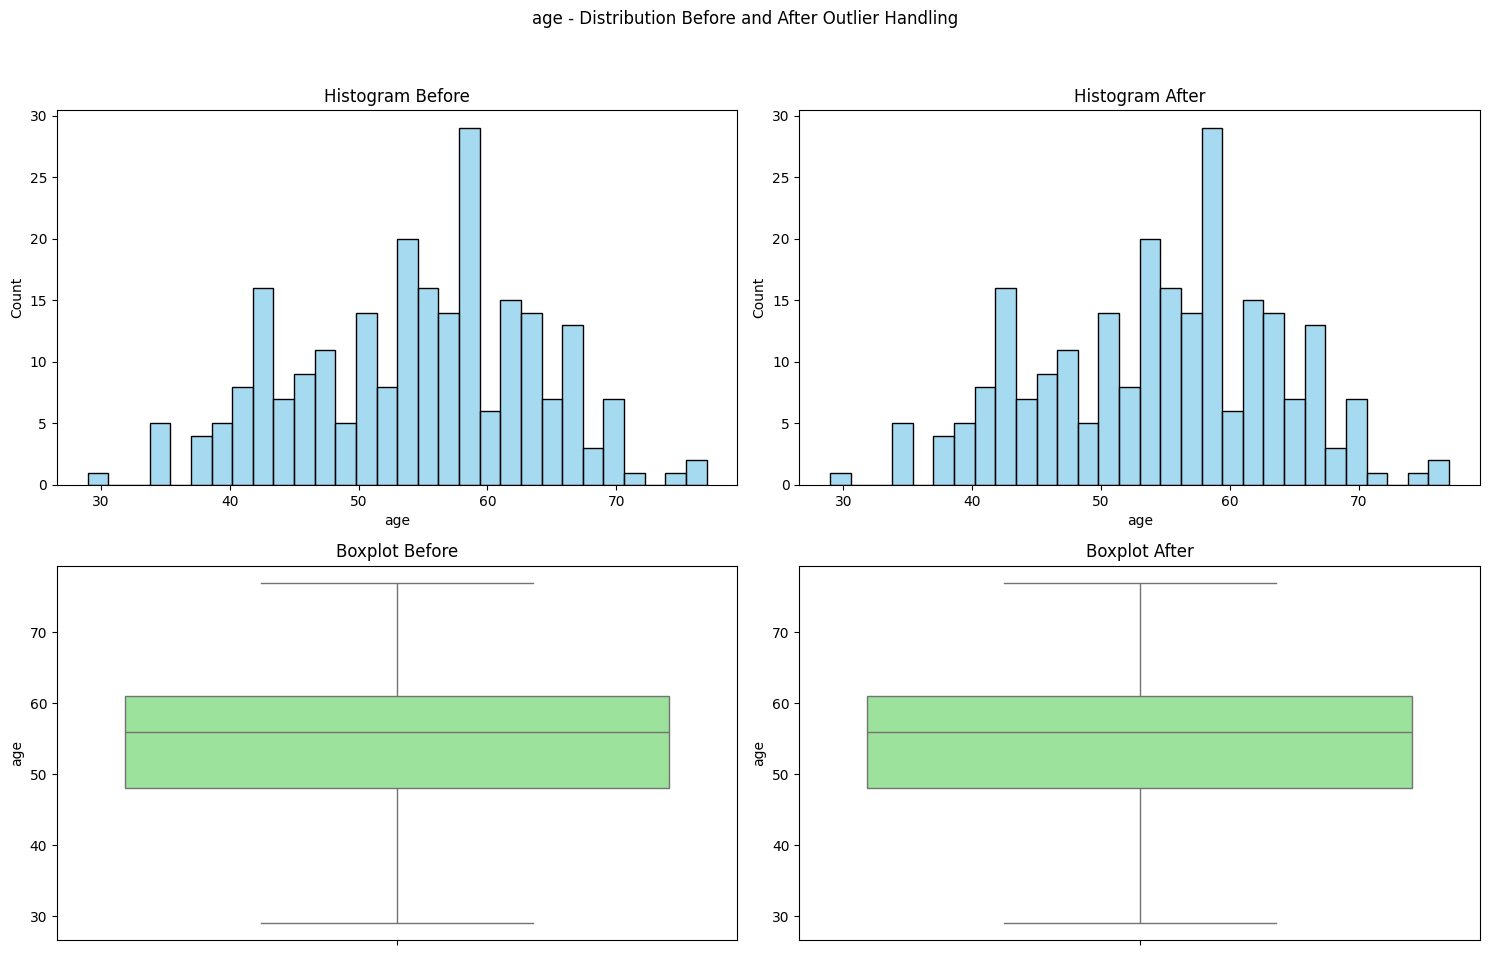

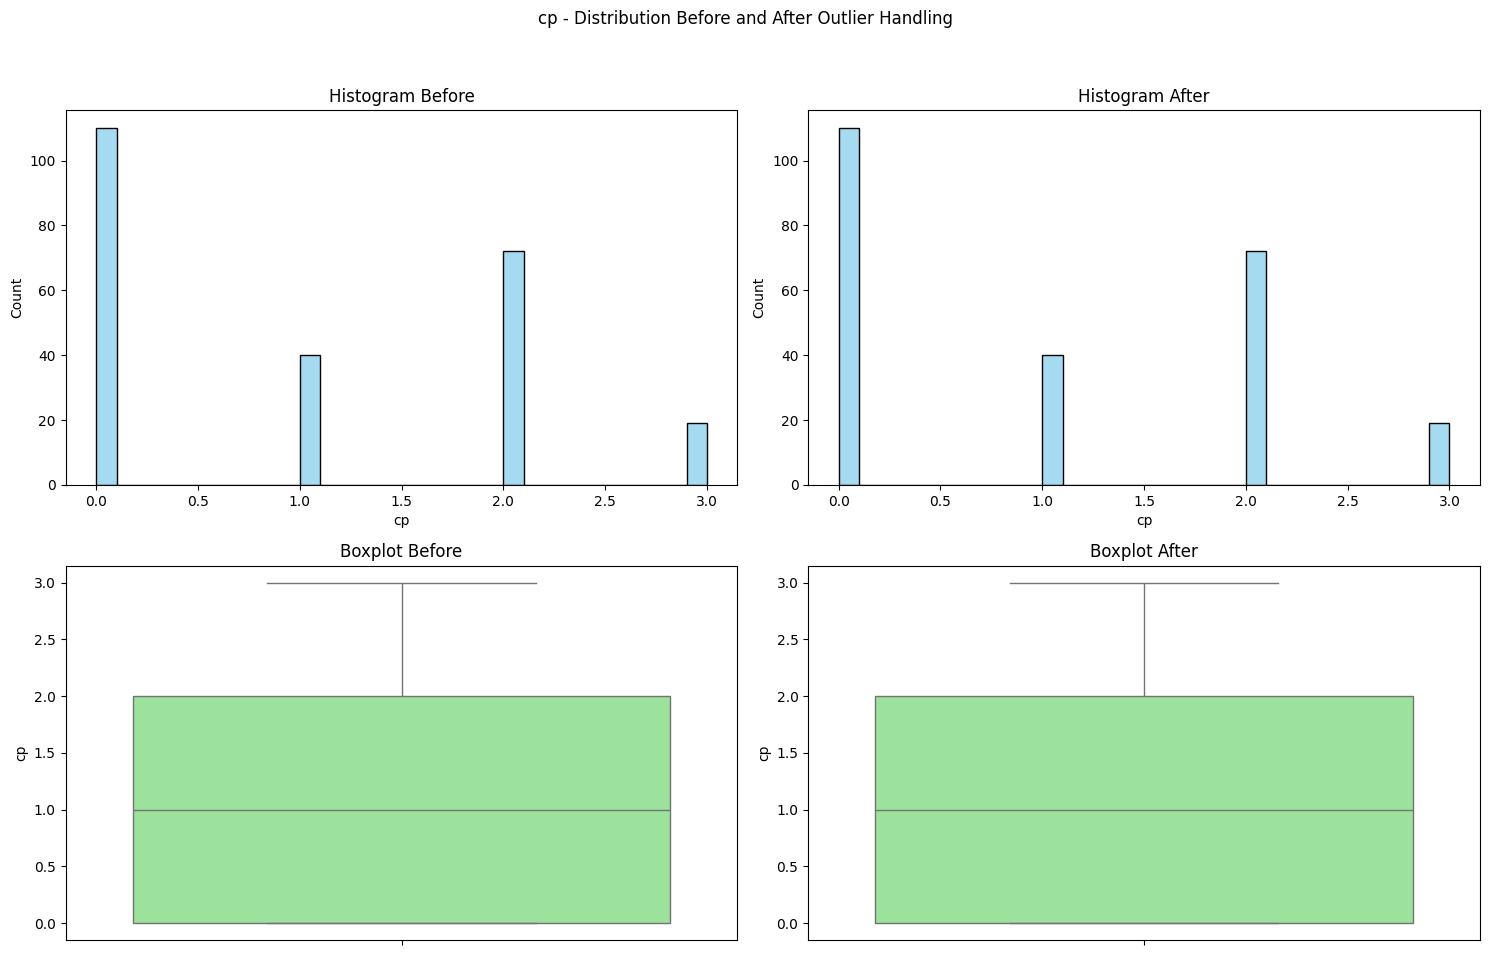

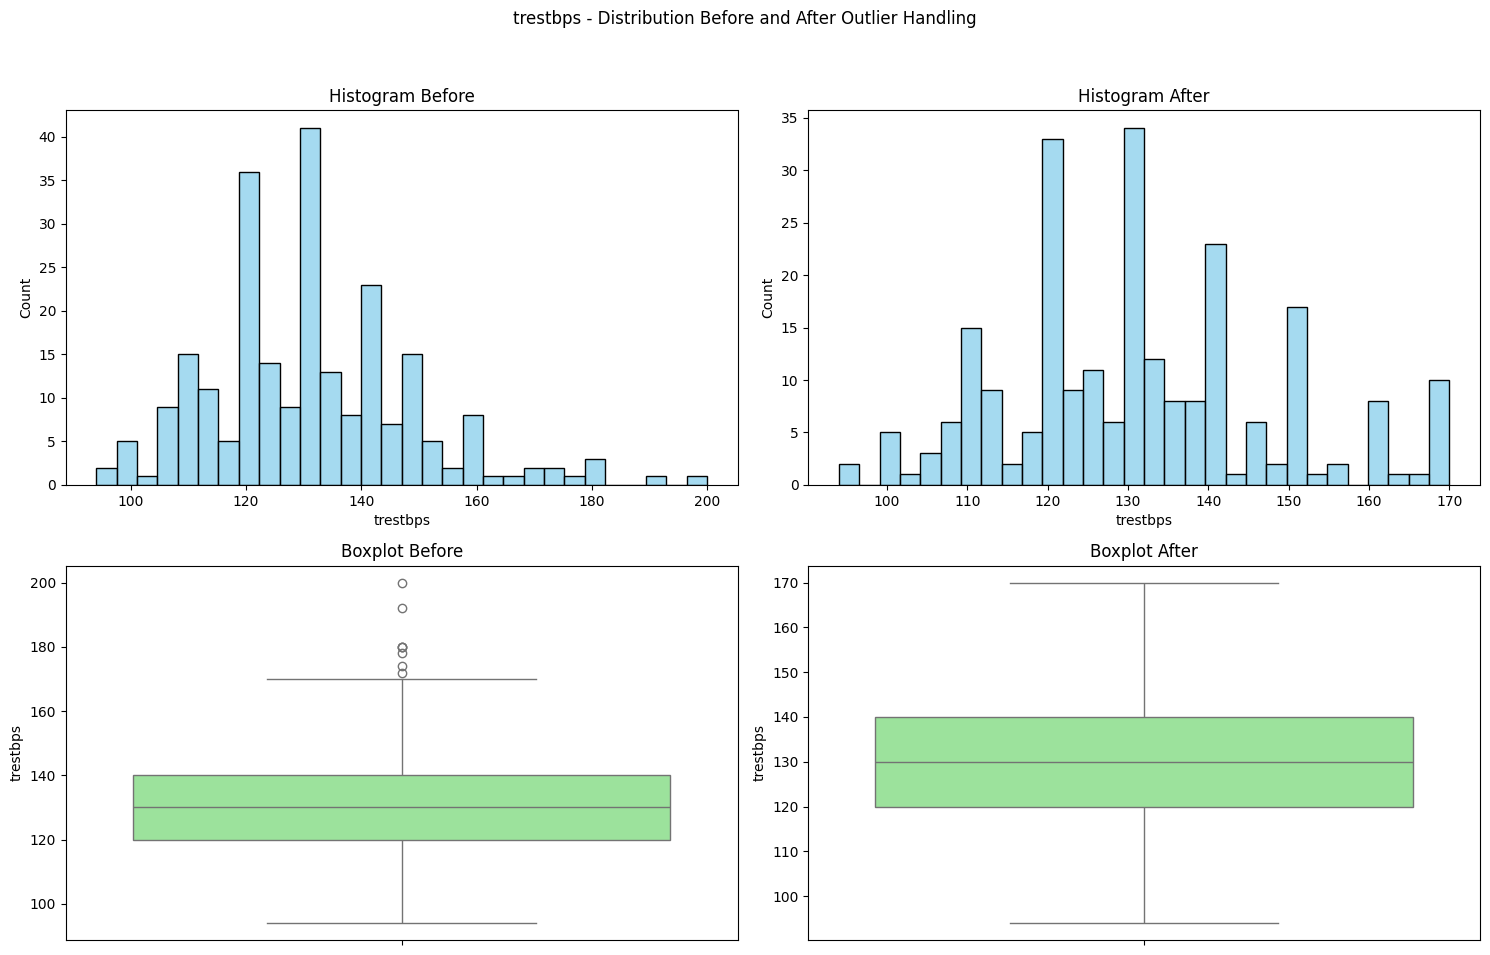

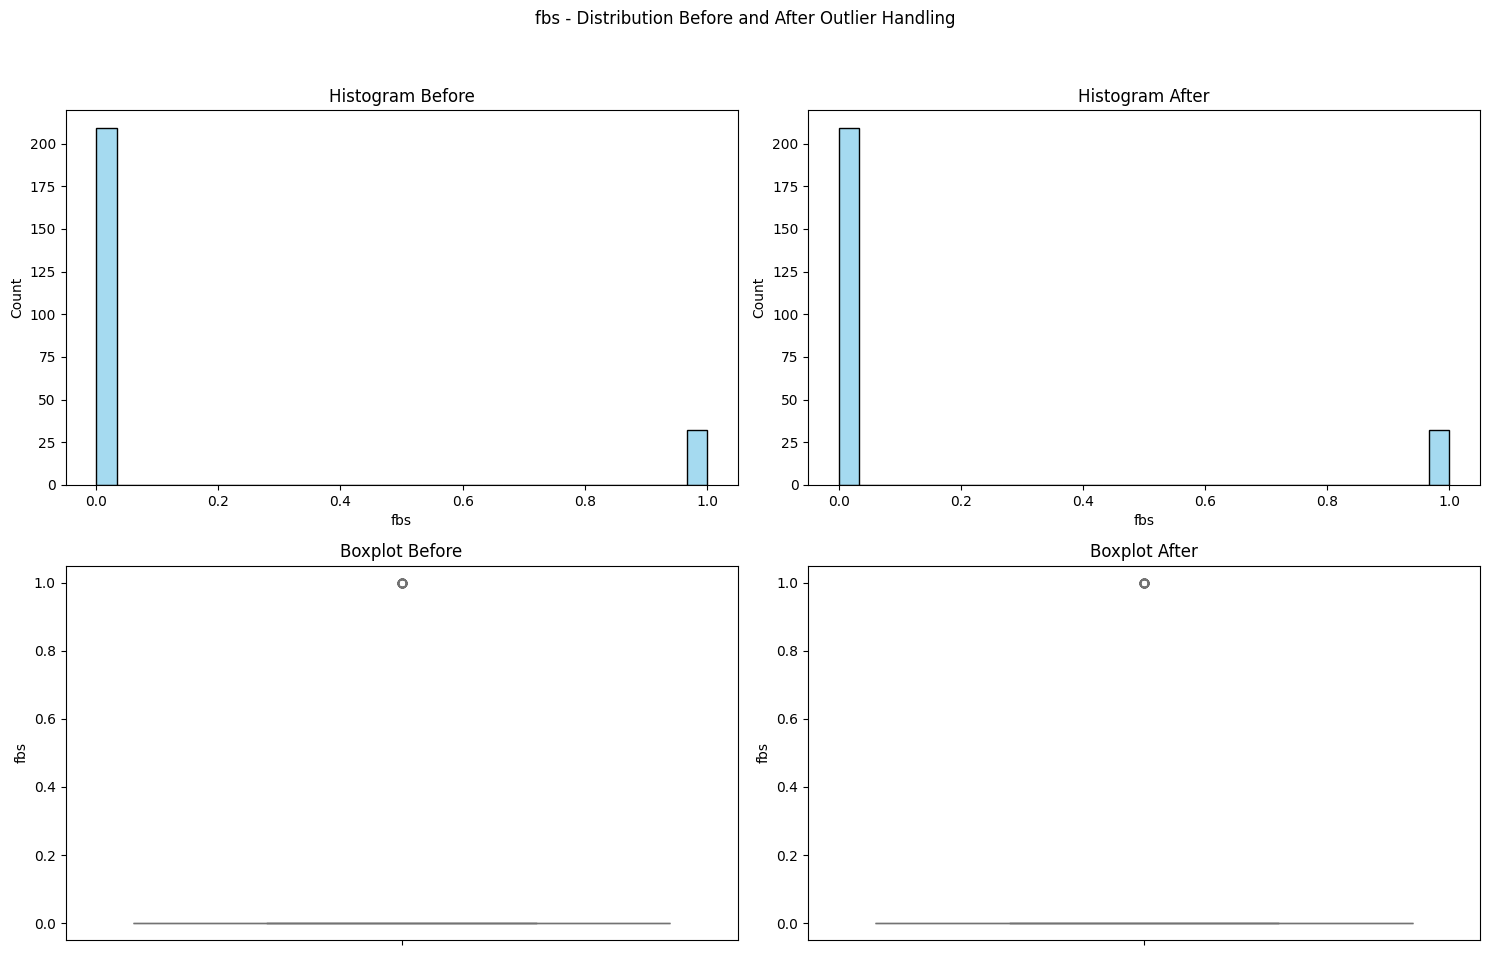

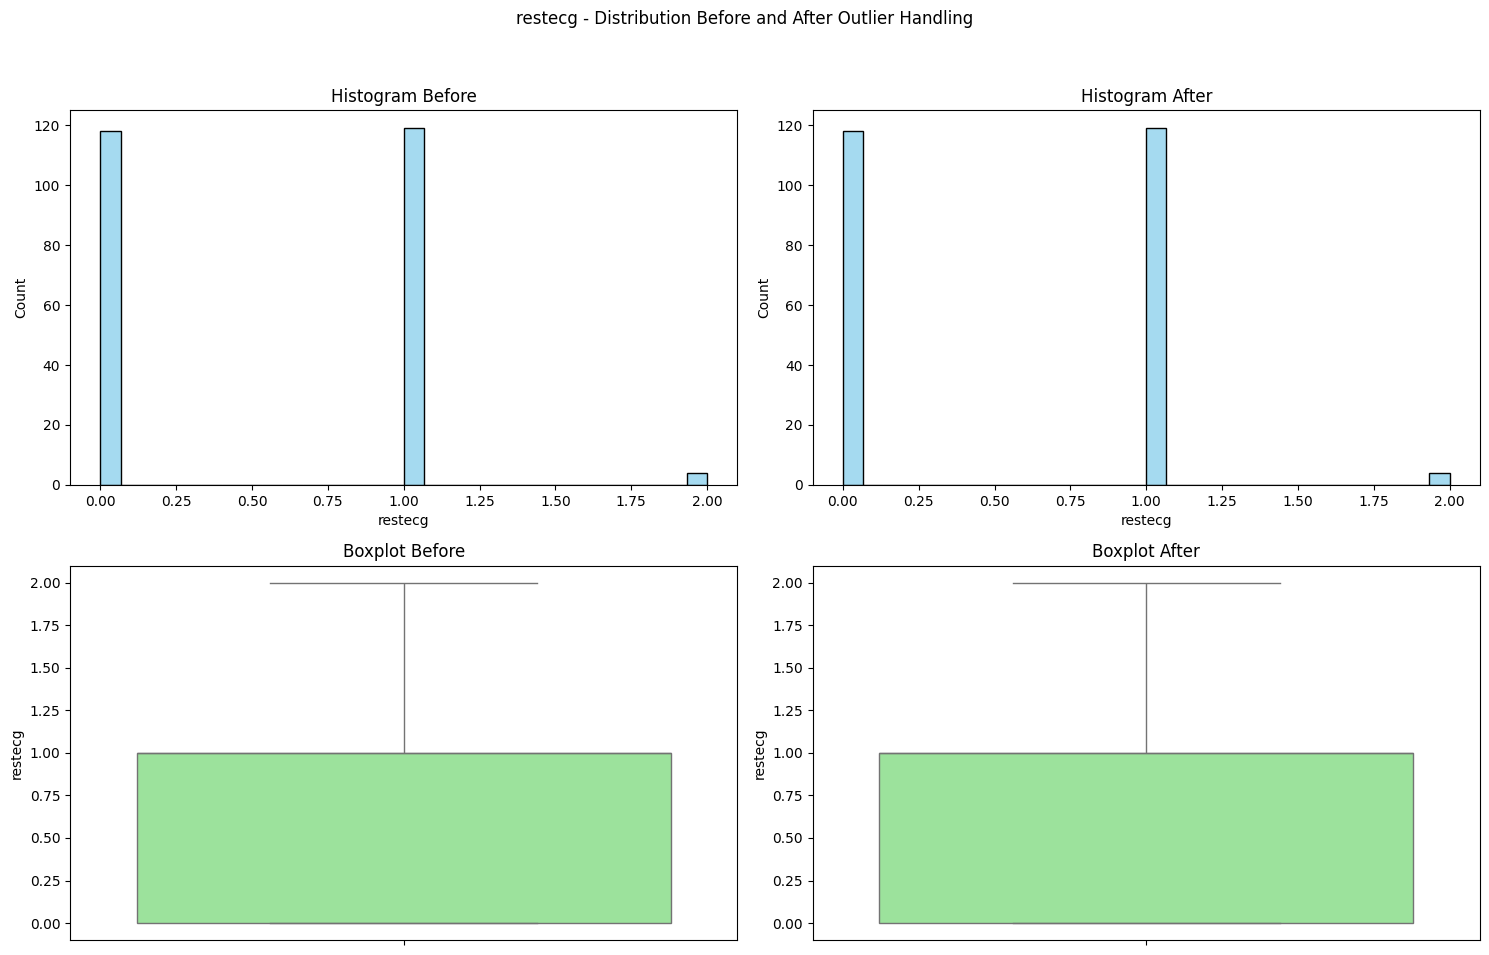

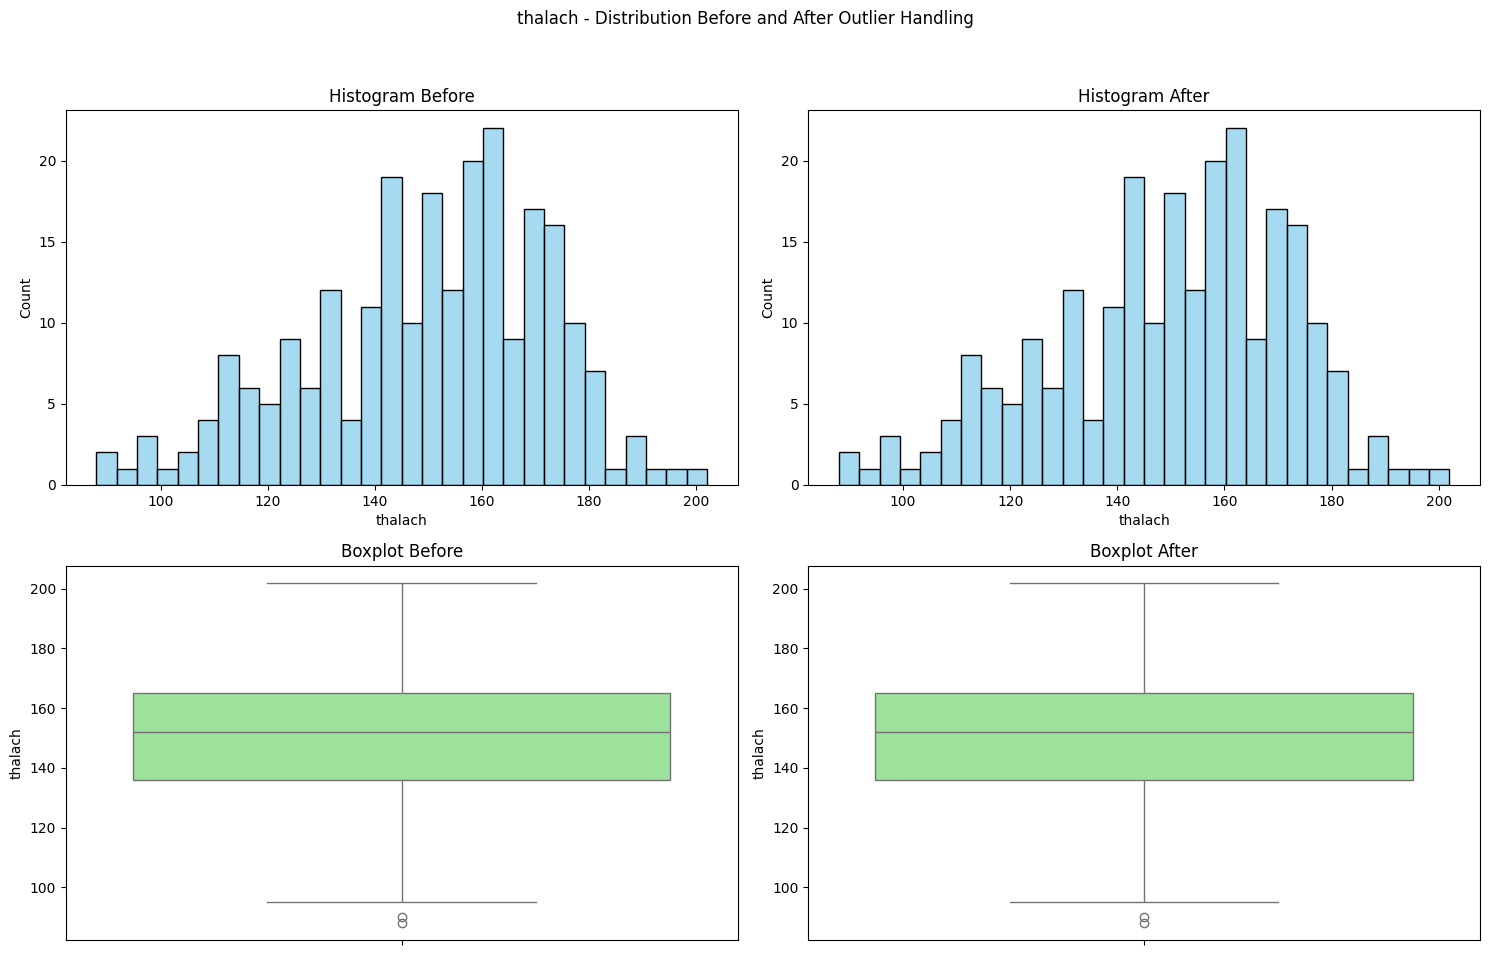

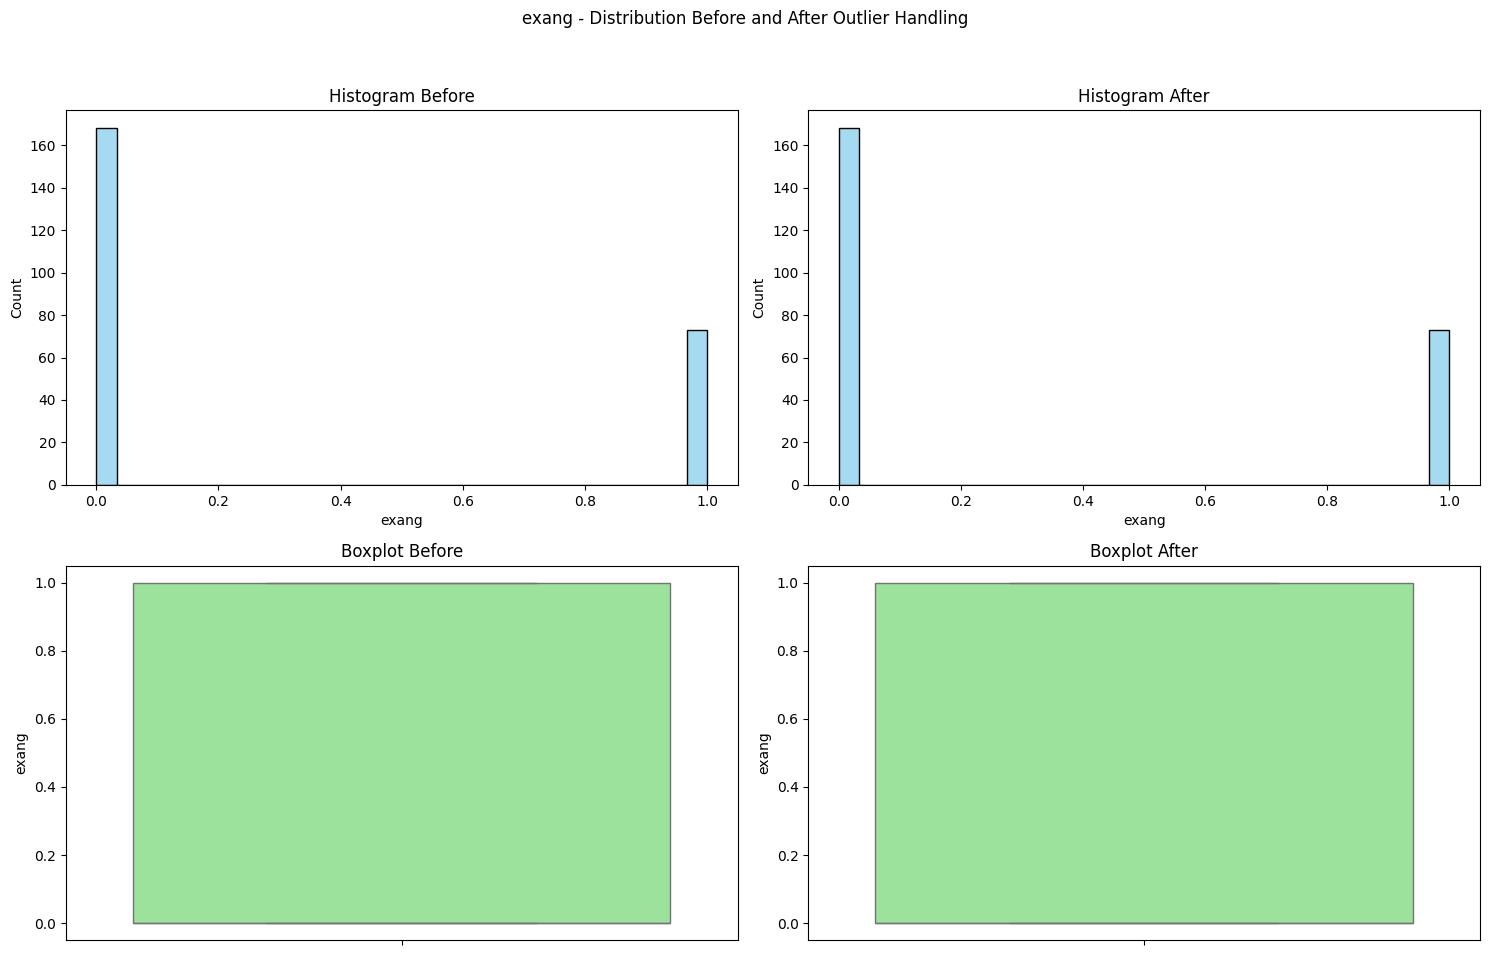

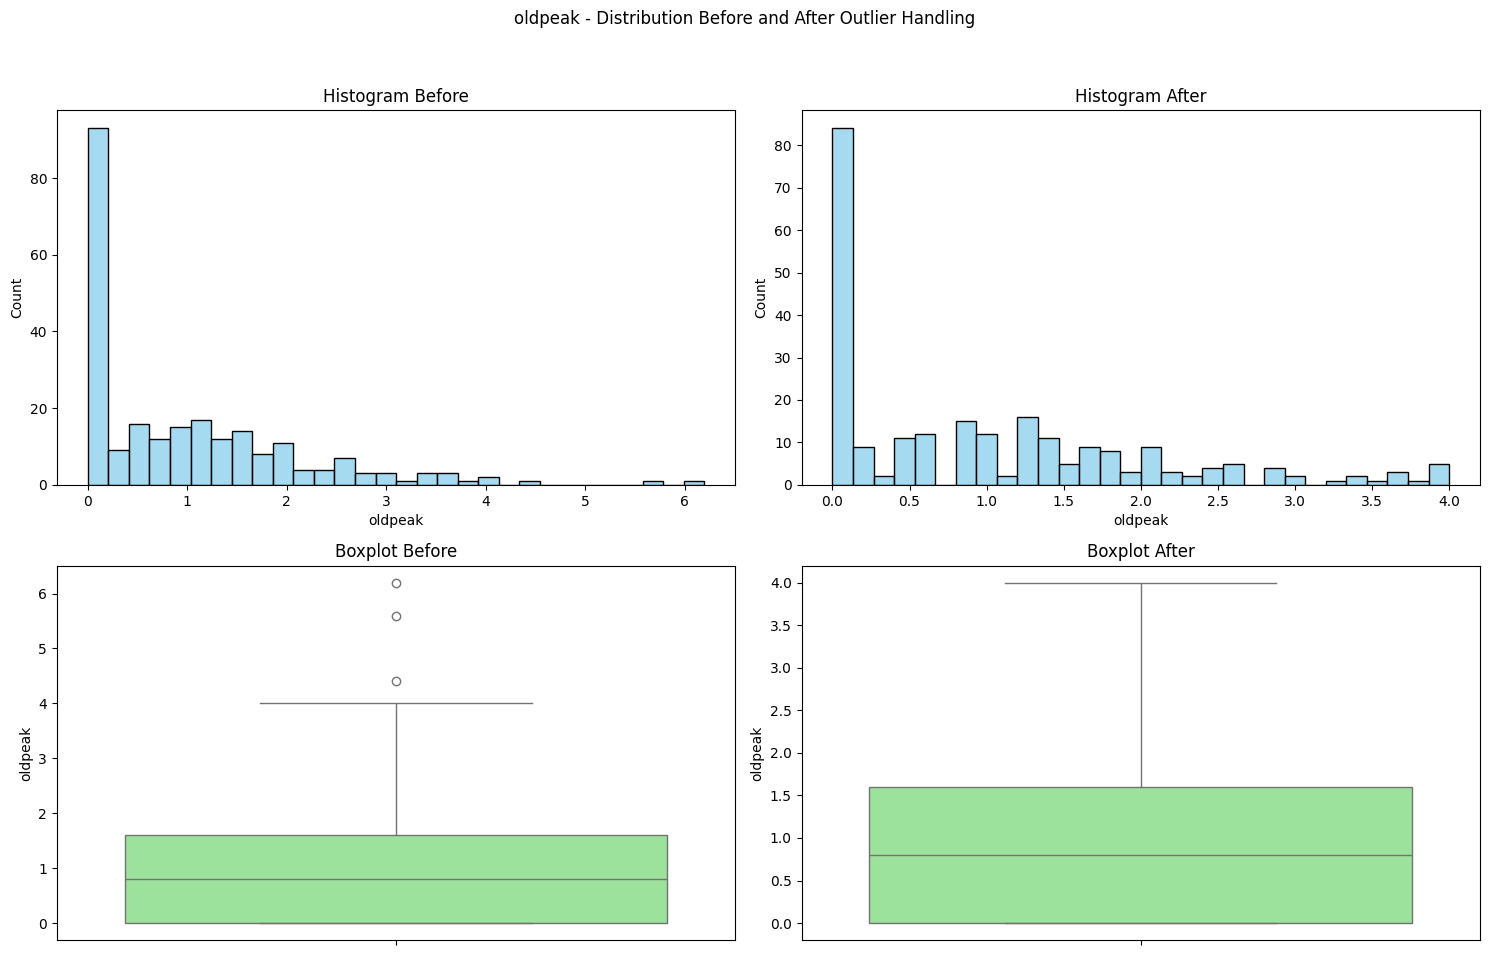

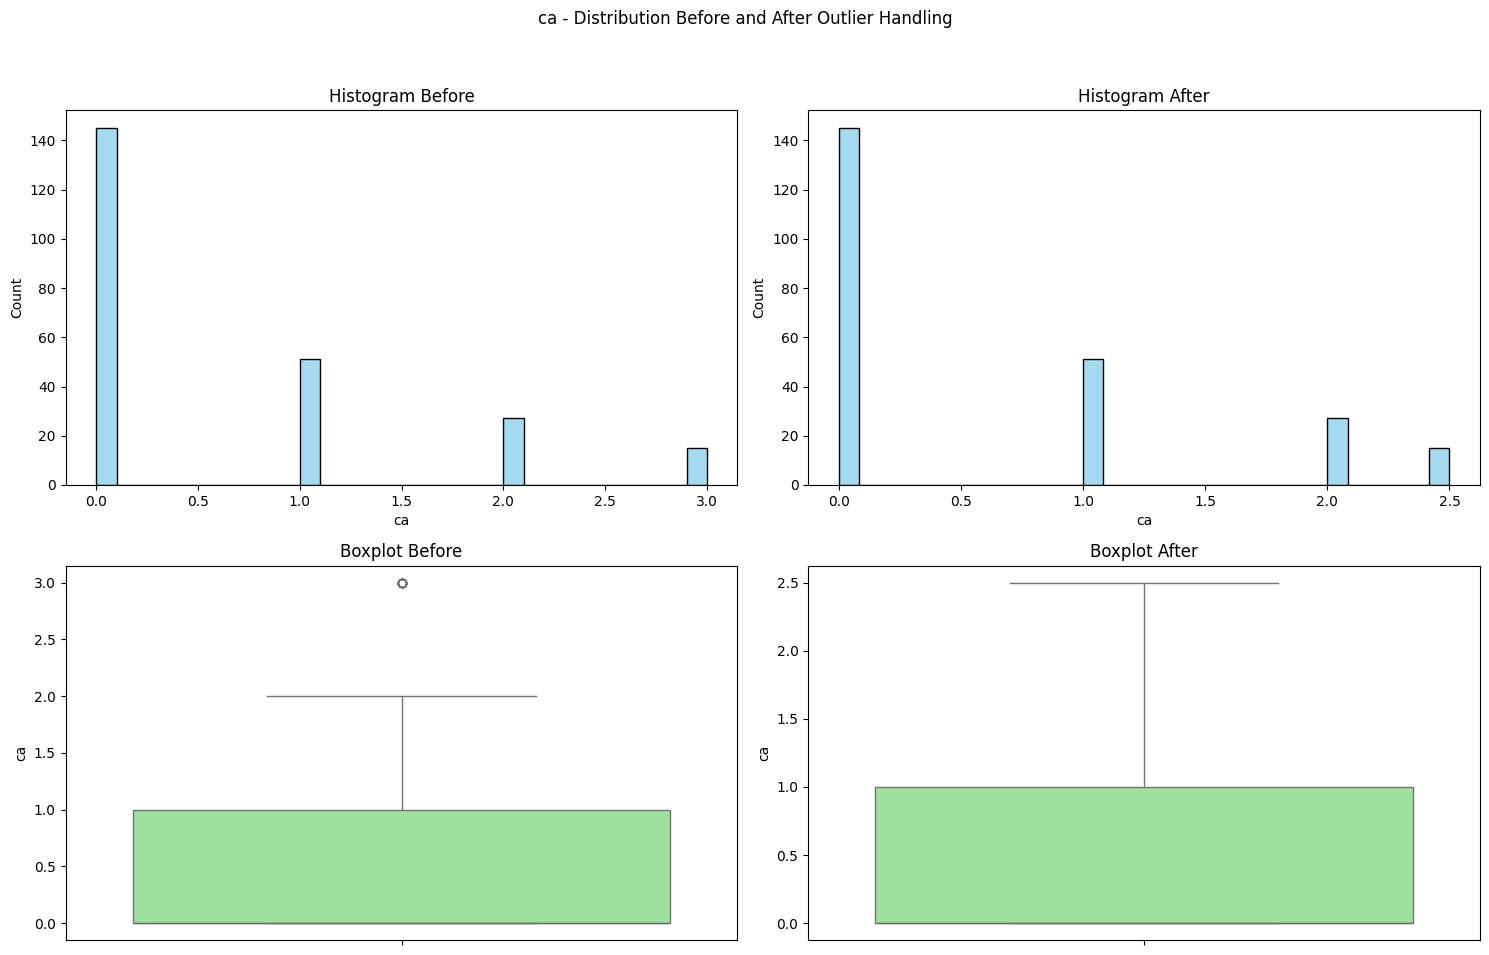

In [46]:
# Using the Function
for col in num_cols:
    outlier_handling_plot_comparison(X_train, X_train_capped, col)

## Spliting Data Numerik dan Kategorik

In [47]:
# column numeric list
num_columns = X_train_capped.select_dtypes(include=np.number).columns.tolist()
# column categorical list
cat_columns = X_train_capped.select_dtypes(include=['object']).columns.tolist()

print('Numerical List: ', num_columns)
print('Catgorical List: ', cat_columns)

Numerical List:  ['age', 'cp', 'trestbps', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'ca']
Catgorical List:  ['sex', 'slope', 'thal', 'class_chol']


In [48]:
# override X_train with spliting list
X_train_num = X_train_capped[num_columns]
X_train_cat = X_train_capped[cat_columns]
# override X_test with spliting list
X_test_num = X_test_capped[num_columns]
X_test_cat = X_test_capped[cat_columns]

In [49]:
print('Size X_train_num:',X_train_num.shape)
print('Size X_train_cat:',X_train_cat.shape)
print('\n')
print('Size X_test_num:',X_test_num.shape)
print('Size X_test_cat:',X_test_cat.shape)

Size X_train_num: (241, 9)
Size X_train_cat: (241, 4)


Size X_test_num: (61, 9)
Size X_test_cat: (61, 4)


## Feature Selection

### Categories Feature

In [50]:
# Finding the correlation between categorical columns and 'Attrition' using Kendall Tau's correlation

p_values = []
interpretation = []
cols = []
corr = []


for col in X_train_cat.columns:
  corr_coef, p_value = kendalltau(X_train_cat[col], y_train)

  p_values.append(p_value)
  cols.append(col)
  corr.append(corr_coef)

  if p_value < 0.05:
    interpretation.append('Significant Correlation')
  else :
    interpretation.append('No Significant Correlation')

cat_corr= pd.DataFrame({'Column Name':cols,
              'Correlation Coefficient' : corr,
              'P-value':p_values,
              'Interpretation': interpretation })

cat_corr

,Column Name,Correlation Coefficient,P-value,Interpretation
0,sex,-0.297279,4.116216e-06,Significant Correlation
1,slope,0.359440,1.125648e-08,Significant Correlation
2,thal,NaN,NaN,No Significant Correlation
3,class_chol,-0.060608,3.244259e-01,No Significant Correlation


In [51]:
# filter corelation categorical
cat_corr = cat_corr[cat_corr['Interpretation'] == "Significant Correlation"]

cat_corr

,Column Name,Correlation Coefficient,P-value,Interpretation
0,sex,-0.297279,4.116216e-06,Significant Correlation
1,slope,0.359440,1.125648e-08,Significant Correlation


In [52]:
list_cat = cat_corr['Column Name'].values.tolist()
list_cat

['sex', 'slope']

Jadi feature yang di pakai dari categorical column yaitu ('sex', 'slope')

### Numerical Feature

In [53]:
# Finding the correlation between numerical columns and 'price' using pearsonr and spearmanr correlation

p_values = []
interpretation = []
cols = []
corr = []

for col in X_train_num.columns:
  if abs(X_train_num[col].skew()) < 0.5:                    #For Normally Distributed Columns
    corr_coef, p_value = pearsonr(X_train_num[col], y_train)

    p_values.append(p_value)
    cols.append(col)
    corr.append(corr_coef)

    if p_value < 0.05:
      interpretation.append('Significant Correlation')
    else :
      interpretation.append('No Significant Correlation')
  else:                                                     #For Non Normally Distributed Columns
    corr_coef, p_value = spearmanr(X_train_num[col], y_train)

    p_values.append(p_value)
    cols.append(col)
    corr.append(corr_coef)

    if p_value < 0.05:
      interpretation.append('Significant Correlation')
    else :
      interpretation.append('No Significant Correlation')

num_corr = pd.DataFrame({'Column Name':cols,
              'Correlation Coefficient' : corr,
              'P-value':p_values,
              'Interpretation': interpretation })

num_corr

,Column Name,Correlation Coefficient,P-value,Interpretation
0,age,-0.209572,1.064367e-03,Significant Correlation
1,cp,0.386758,5.084137e-10,Significant Correlation
2,trestbps,-0.143796,2.559332e-02,Significant Correlation
3,fbs,-0.012947,8.415208e-01,No Significant Correlation
4,restecg,0.132388,4.001633e-02,Significant Correlation
5,thalach,0.404686,6.520819e-11,Significant Correlation
6,exang,-0.416980,1.482985e-11,Significant Correlation
7,oldpeak,-0.400188,1.104335e-10,Significant Correlation
8,ca,NaN,NaN,No Significant Correlation


In [54]:
# filter corelation categorical
num_corr = num_corr[num_corr['Interpretation'] == "Significant Correlation"]
num_corr

,Column Name,Correlation Coefficient,P-value,Interpretation
0,age,-0.209572,1.064367e-03,Significant Correlation
1,cp,0.386758,5.084137e-10,Significant Correlation
2,trestbps,-0.143796,2.559332e-02,Significant Correlation
4,restecg,0.132388,4.001633e-02,Significant Correlation
5,thalach,0.404686,6.520819e-11,Significant Correlation
6,exang,-0.416980,1.482985e-11,Significant Correlation
7,oldpeak,-0.400188,1.104335e-10,Significant Correlation


In [55]:
list_num  = num_corr['Column Name'].values.tolist()
list_num 

['age', 'cp', 'trestbps', 'restecg', 'thalach', 'exang', 'oldpeak']

<Axes: >

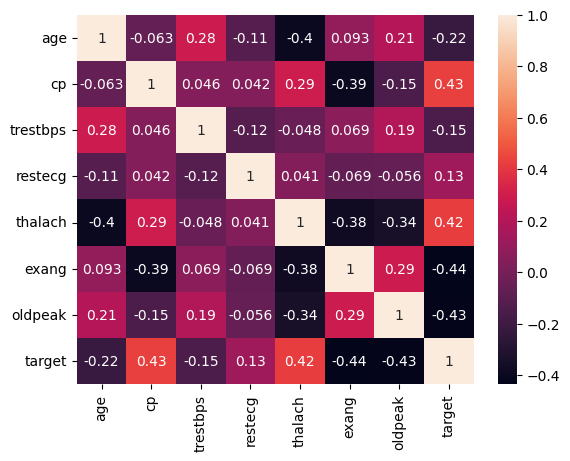

In [56]:
#Creating a heatmap for a better visualization
sns.heatmap(data[['age', 'cp', 'trestbps', 'restecg', 'thalach', 'exang', 'oldpeak', 'target']].corr(),annot=True)

Dari korelasi Numerical column yaitu ('Age','MonthlyIncome','TotalWorkingYears','YearsAtCompany','YearsInCurrentRole','YearsWithCurrentManager')

### Membuat variable baru Untuk Feature yang berkolerasi

In [57]:
# print list correlation
print('column katgorik:', list_cat)
print('column numerik:', list_num)

column katgorik: ['sex', 'slope']
column numerik: ['age', 'cp', 'trestbps', 'restecg', 'thalach', 'exang', 'oldpeak']


In [58]:
# append ke x_train dan 
X_train_cat = X_train_cat[list_cat]
X_train_num = X_train_num[list_num]

X_test_cat = X_test_cat[list_cat]
X_test_num = X_test_num[list_num]

In [59]:
# Checking the categorical data
X_train_cat

,sex,slope
132,Male,Upsloping
203,Male,Flat
197,Male,Flat
75,Female,Flat
177,Male,Upsloping
...,...,...
189,Male,Upsloping
71,Male,Upsloping
106,Male,Flat
271,Male,Flat


In [60]:
# Checking the numerical data
X_train_num

,age,cp,trestbps,restecg,thalach,exang,oldpeak
132,42,1,120,1,162,0,0.0
203,68,2,170,0,150,1,1.6
197,67,0,125,1,163,0,0.2
75,55,1,135,0,161,0,1.4
177,64,2,140,1,158,0,0.0
...,...,...,...,...,...,...,...
189,41,0,110,0,158,0,0.0
71,51,2,94,1,154,1,0.0
106,69,3,160,0,131,0,0.1
271,61,3,134,1,145,0,2.6


In [61]:
# Checking the numerical data
X_test_num

,age,cp,trestbps,restecg,thalach,exang,oldpeak
180,55,0,132,1,132.0,1,1.2
229,64,2,125,1,131.0,1,1.8
111,57,2,150,1,173.0,0,0.2
247,66,1,160,1,120.0,1,0.0
60,71,2,110,0,130.0,0,0.0
...,...,...,...,...,...,...,...
250,51,0,140,1,122.0,1,4.0
104,50,2,129,1,163.0,0,0.0
300,68,0,144,1,141.0,0,3.4
194,60,2,140,0,155.0,0,3.0


In [62]:
# Checking the categorical data
X_test_cat

,sex,slope
180,Male,Flat
229,Male,Flat
111,Male,Upsloping
247,Male,Flat
60,Female,Upsloping
...,...,...
250,Male,Flat
104,Male,Upsloping
300,Male,Flat
194,Male,Flat


## Scaling and Encoding

### Scaling

In [63]:
# Scaling menggunakan minMax sclaer karena model

#Initialize the Standar Scaler
scaler = MinMaxScaler()

#Fit_transform for X_train, transform for X_test
X_train_num_scaled = scaler.fit_transform(X_train_num) ## only fit in train
X_test_num_scaled = scaler.transform(X_test_num)

X_train_num_scaled

array([[0.27083333, 0.33333333, 0.34210526, ..., 0.64912281, 0.        ,
        0.        ],
       [0.8125    , 0.66666667, 1.        , ..., 0.54385965, 1.        ,
        0.4       ],
       [0.79166667, 0.        , 0.40789474, ..., 0.65789474, 0.        ,
        0.05      ],
       ...,
       [0.83333333, 1.        , 0.86842105, ..., 0.37719298, 0.        ,
        0.025     ],
       [0.66666667, 1.        , 0.52631579, ..., 0.5       , 0.        ,
        0.65      ],
       [0.70833333, 0.33333333, 0.60526316, ..., 0.79824561, 0.        ,
        0.        ]])

### Encoding

In [64]:
# Copy biar tidak mengulang jika salah
X_train_cat_copy = X_train_cat.copy()
X_test_cat_copy = X_test_cat.copy()

In [65]:
X_train_cat_copy.nunique()

sex      2
slope    3
dtype: int64

In [66]:
X_train_cat_copy

,sex,slope
132,Male,Upsloping
203,Male,Flat
197,Male,Flat
75,Female,Flat
177,Male,Upsloping
...,...,...
189,Male,Upsloping
71,Male,Upsloping
106,Male,Flat
271,Male,Flat


In [67]:
#Initialize the OneHotEncoder 
ohe_Encoder = OneHotEncoder(handle_unknown='ignore',sparse_output=False)



#Fit_transform for X_train, transform for X_test Using ordinalEncoder
X_train_cat_encoded = ohe_Encoder.fit_transform(X_train_cat_copy)
X_test_cat_encoded = ohe_Encoder.transform(X_test_cat_copy)



#Fit_transform for X_train, transform for X_test
X_train_cat_encoded


array([[0., 1., 0., 0., 1.],
       [0., 1., 0., 1., 0.],
       [0., 1., 0., 1., 0.],
       ...,
       [0., 1., 0., 1., 0.],
       [0., 1., 0., 1., 0.],
       [1., 0., 0., 0., 1.]])

### Concatenate Categorical and Numerical

In [68]:
X_train_final = np.concatenate([X_train_num_scaled,X_train_cat_encoded],axis=1)
X_test_final = np.concatenate([X_test_num_scaled, X_test_cat_encoded],axis=1)

# Transform into dataframe
X_train_final = pd.DataFrame(X_train_final)
X_test_final = pd.DataFrame(X_test_final)

In [69]:
X_train_final

,0,1,2,3,4,5,6,7,8,9,10,11
0,0.270833,0.333333,0.342105,0.5,0.649123,0.0,0.000,0.0,1.0,0.0,0.0,1.0
1,0.812500,0.666667,1.000000,0.0,0.543860,1.0,0.400,0.0,1.0,0.0,1.0,0.0
2,0.791667,0.000000,0.407895,0.5,0.657895,0.0,0.050,0.0,1.0,0.0,1.0,0.0
3,0.541667,0.333333,0.539474,0.0,0.640351,0.0,0.350,1.0,0.0,0.0,1.0,0.0
4,0.729167,0.666667,0.605263,0.5,0.614035,0.0,0.000,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
236,0.250000,0.000000,0.210526,0.0,0.614035,0.0,0.000,0.0,1.0,0.0,0.0,1.0
237,0.458333,0.666667,0.000000,0.5,0.578947,1.0,0.000,0.0,1.0,0.0,0.0,1.0
238,0.833333,1.000000,0.868421,0.0,0.377193,0.0,0.025,0.0,1.0,0.0,1.0,0.0
239,0.666667,1.000000,0.526316,0.5,0.500000,0.0,0.650,0.0,1.0,0.0,1.0,0.0


In [70]:
X_test_final

,0,1,2,3,4,5,6,7,8,9,10,11
0,0.541667,0.000000,0.500000,0.5,0.385965,1.0,0.30,0.0,1.0,0.0,1.0,0.0
1,0.729167,0.666667,0.407895,0.5,0.377193,1.0,0.45,0.0,1.0,0.0,1.0,0.0
2,0.583333,0.666667,0.736842,0.5,0.745614,0.0,0.05,0.0,1.0,0.0,0.0,1.0
3,0.770833,0.333333,0.868421,0.5,0.280702,1.0,0.00,0.0,1.0,0.0,1.0,0.0
4,0.875000,0.666667,0.210526,0.0,0.368421,0.0,0.00,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
56,0.458333,0.000000,0.605263,0.5,0.298246,1.0,1.00,0.0,1.0,0.0,1.0,0.0
57,0.437500,0.666667,0.460526,0.5,0.657895,0.0,0.00,0.0,1.0,0.0,0.0,1.0
58,0.812500,0.000000,0.657895,0.5,0.464912,0.0,0.85,0.0,1.0,0.0,1.0,0.0
59,0.645833,0.666667,0.605263,0.0,0.587719,0.0,0.75,0.0,1.0,0.0,1.0,0.0


In [71]:
# checking sizes
print('X Ukuran train-set :', X_train_final.shape)
print('X Ukuran test-set :', X_test_final.shape)
print('')
print('y Ukuran train-set :', y_train.shape)
print('y Ukuran test-set :', y_test.shape)

X Ukuran train-set : (241, 12)
X Ukuran test-set : (61, 12)

y Ukuran train-set : (241,)
y Ukuran test-set : (61,)


---

# vi. Modeling 

Objective model yang di gunakan adalah decision tree dan random forest. Model Evaluasi akan memakai Metric `Recall` karena untuk mengurangi False Negative (Indikasi tidak terkana serangan jantung, namun faktanya terkena serangan jantung)

### Base Model

In [72]:
base_dectree = DecisionTreeClassifier() # Decision Tree

In [73]:
base_randFo =  RandomForestClassifier() # Random Forest (Bagging model)

### Model Training

In [74]:
base_dectree.fit(X_train_final,y_train) # Decision Tree

DecisionTreeClassifier()

In [75]:
base_randFo.fit(X_train_final,y_train) # Random Forest (Bagging model)

RandomForestClassifier()

### Model Evaluation

In [76]:
# Model Evaluation Utilities

# fungsi evaluasi
def performance_check(clf, X, y):
  y_pred = clf.predict(X)
  print('Recall Score - : ', recall_score(y, y_pred)) # metric recall score
  print('Jumlah class - : ' , Counter(y_pred),'\n')
  cm = confusion_matrix(y, y_pred)
  disp = ConfusionMatrixDisplay(confusion_matrix=cm)
  disp.plot()
  plt.show()
  print(classification_report(y, y_pred))


# Save Classification Report into a Dictionary
all_reports = {}
def performance_report(all_reports, y_train, y_pred_train, y_test, y_pred_test, name):
  """ fungsi metric scoring """
  score_reports = {
      'train - precision' : precision_score(y_train, y_pred_train),
      'train - recall' : recall_score(y_train, y_pred_train),
      'train - accuracy' : accuracy_score(y_train, y_pred_train),
      'train - f1_score' : f1_score(y_train, y_pred_train),
      'test - precision' : precision_score(y_test, y_pred_test),
      'test - recall' : recall_score(y_test, y_pred_test),
      'test - accuracy_score' : accuracy_score(y_test, y_pred_test),
      'test - f1_score' : f1_score(y_test, y_pred_test),
  }
  all_reports[name] = score_reports
  return all_reports



Decision Tree - Train
Recall Score - :  1.0
Jumlah class - :  Counter({1: 132, 0: 109}) 



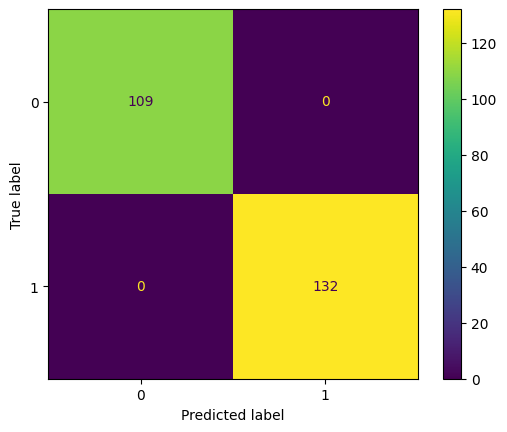

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       109
           1       1.00      1.00      1.00       132

    accuracy                           1.00       241
   macro avg       1.00      1.00      1.00       241
weighted avg       1.00      1.00      1.00       241


Decision Tree - Test
Recall Score - :  0.6875
Jumlah class - :  Counter({0: 33, 1: 28}) 



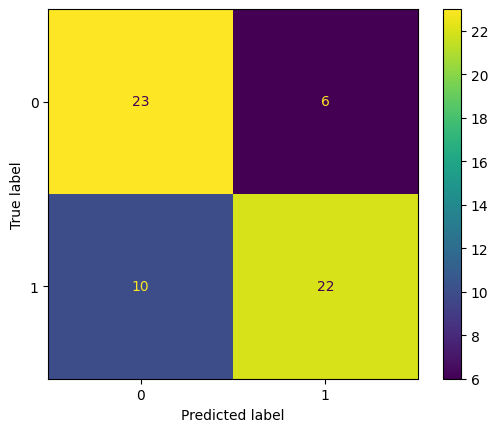

              precision    recall  f1-score   support

           0       0.70      0.79      0.74        29
           1       0.79      0.69      0.73        32

    accuracy                           0.74        61
   macro avg       0.74      0.74      0.74        61
weighted avg       0.74      0.74      0.74        61



In [77]:
# Evaluasi model Decision Tree
print('Decision Tree - Train')
performance_check(base_dectree, X_train_final, y_train)
print('')

print('Decision Tree - Test')
performance_check(base_dectree, X_test_final, y_test)

Random forest classifier model - Train
Recall Score - :  1.0
Jumlah class - :  Counter({1: 132, 0: 109}) 



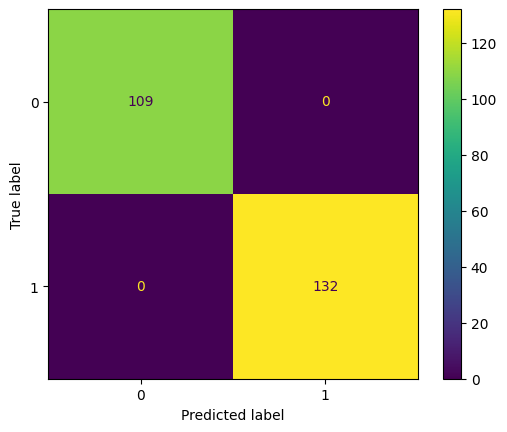

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       109
           1       1.00      1.00      1.00       132

    accuracy                           1.00       241
   macro avg       1.00      1.00      1.00       241
weighted avg       1.00      1.00      1.00       241


Random forest classifier model - Test
Recall Score - :  0.71875
Jumlah class - :  Counter({0: 37, 1: 24}) 



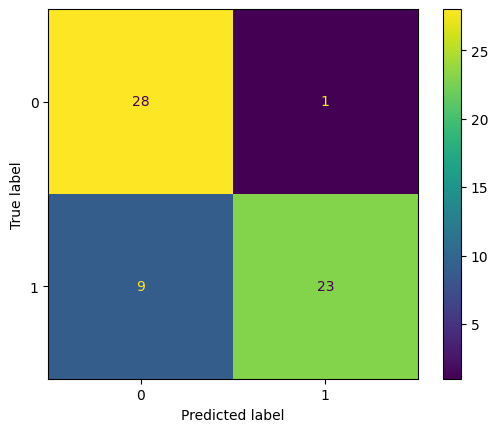

              precision    recall  f1-score   support

           0       0.76      0.97      0.85        29
           1       0.96      0.72      0.82        32

    accuracy                           0.84        61
   macro avg       0.86      0.84      0.83        61
weighted avg       0.86      0.84      0.83        61



In [78]:
# Evaluasi model Random forest
print('Random forest classifier model - Train')
performance_check(base_randFo, X_train_final, y_train,)
print('')

print('Random forest classifier model - Test')
performance_check(base_randFo, X_test_final, y_test)

## Cross Validation

In [80]:
def perform_cross_validation(models, X_train_final, y_train, scoring='recall'):
    results = {}
    num_folds = 5
    for model_name, model in models.items():
        kf = StratifiedKFold(n_splits=num_folds, shuffle=True, random_state=42)
        # Lakukan cross-validation untuk setiap model
        cross_val_scores = cross_val_score(model, X_train_final, y_train, cv=kf, scoring=scoring)
        
        # Simpan hasil cross-validation
        results[model_name] = cross_val_scores
        
        # Tampilkan hasil
        print(f'{model_name} - Precision score - Mean - Cross Validation: {cross_val_scores.mean()}')
        print(f'{model_name} - Precision score - Std - Cross Validation: {cross_val_scores.std()}')
        
        print()
    
    return results

# Definisikan model evaluasi
models = {
    'Decision Tree': base_dectree,
    'Random Forest': base_randFo,
}

# Panggil fungsi perform_cross_validation
results = perform_cross_validation(models, X_train_final, y_train)


Decision Tree - Precision score - Mean - Cross Validation: 0.7062678062678063
Decision Tree - Precision score - Std - Cross Validation: 0.12220329381450858

Random Forest - Precision score - Mean - Cross Validation: 0.7655270655270655
Random Forest - Precision score - Std - Cross Validation: 0.0641411722923416



In [81]:
# penggunaan fungsi performance_report 
all_reports = {}

# Melakukan laporan kinerja untuk model Decision Tree
all_reports = performance_report(all_reports, y_train,base_dectree.predict(X_train_final), y_test, base_dectree.predict(X_test_final), 'Decision Tree')

# Melakukan laporan kinerja untuk model Random Forest
all_reports = performance_report(all_reports, y_train, base_randFo.predict(X_train_final), y_test, base_randFo.predict(X_test_final), 'Random Forest')

# Membuat DataFrame dari dictionary all_reports
df_report_base_model = pd.DataFrame(all_reports)

# Melihat semua laporan kinerja
print(all_reports)

df_report_base_model


{'Decision Tree': {'train - precision': 1.0, 'train - recall': 1.0, 'train - accuracy': 1.0, 'train - f1_score': 1.0, 'test - precision': 0.7857142857142857, 'test - recall': 0.6875, 'test - accuracy_score': 0.7377049180327869, 'test - f1_score': 0.7333333333333333}, 'Random Forest': {'train - precision': 1.0, 'train - recall': 1.0, 'train - accuracy': 1.0, 'train - f1_score': 1.0, 'test - precision': 0.9583333333333334, 'test - recall': 0.71875, 'test - accuracy_score': 0.8360655737704918, 'test - f1_score': 0.8214285714285714}}


,Decision Tree,Random Forest
train - precision,1.000000,1.000000
train - recall,1.000000,1.000000
train - accuracy,1.000000,1.000000
train - f1_score,1.000000,1.000000
test - precision,0.785714,0.958333
test - recall,0.687500,0.718750
test - accuracy_score,0.737705,0.836066
test - f1_score,0.733333,0.821429


Conclusion:  
Dari hasil base model yang terbaik adalah Random Forest bisa di lihat dari cross val yang stabil. Jadi dari sini saya akan memakai model random forest untuk hyper Parameter tuning (agar menghemat waktu)

## Hyperparameter Tuning

In [82]:
# Define Parameter

randFo_param = {
    "n_estimators": [5, 10, 15, 20, 25], 
    "max_depth": [3, 5, 7, 9, 11, 13]
}


- Grid Search

In [83]:
# Model Random Forest
randfo = GridSearchCV(estimator=RandomForestClassifier(random_state=42,class_weight="balanced"),
                         param_grid=randFo_param,
                         cv=5,
                         n_jobs=-1,
                         verbose=2,
                         scoring='f1')

randfo.fit(X_train_final, y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


GridSearchCV(cv=5,
             estimator=RandomForestClassifier(class_weight='balanced',
                                              random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [3, 5, 7, 9, 11, 13],
                         'n_estimators': [5, 10, 15, 20, 25]},
             scoring='f1', verbose=2)

In [84]:
# Get Best Hyperparameters
print('Random Forest: ',randfo.best_params_)
print('--------')



Random Forest:  {'max_depth': 3, 'n_estimators': 15}
--------


In [85]:
# Define model with best params
randfo_tuned = randfo.best_estimator_

randfo_tuned

RandomForestClassifier(class_weight='balanced', max_depth=3, n_estimators=15,
                       random_state=42)

## Model evalution Tuning

Random forest classifier model - Train
Recall Score - :  0.8484848484848485
Jumlah class - :  Counter({1: 135, 0: 106}) 



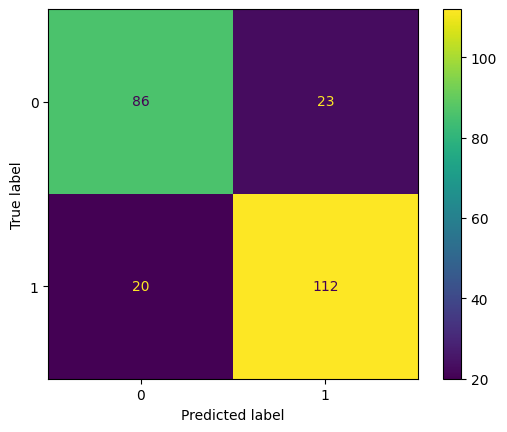

              precision    recall  f1-score   support

           0       0.81      0.79      0.80       109
           1       0.83      0.85      0.84       132

    accuracy                           0.82       241
   macro avg       0.82      0.82      0.82       241
weighted avg       0.82      0.82      0.82       241


Random forest classifier model - Test
Recall Score - :  0.78125
Jumlah class - :  Counter({0: 34, 1: 27}) 



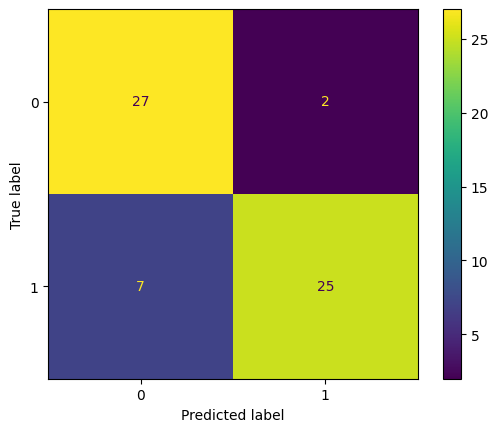

              precision    recall  f1-score   support

           0       0.79      0.93      0.86        29
           1       0.93      0.78      0.85        32

    accuracy                           0.85        61
   macro avg       0.86      0.86      0.85        61
weighted avg       0.86      0.85      0.85        61



In [86]:
# Evaluasi model Random forest
print('Random forest classifier model - Train')
performance_check(randfo_tuned, X_train_final, y_train,)
print('')

print('Random forest classifier model - Test')
performance_check(randfo_tuned, X_test_final, y_test)

In [87]:
# Definisikan model evaluasi
models_tuning = {

    'Random Forest': randfo_tuned,

}

# Panggil fungsi perform_cross_validation
results = perform_cross_validation(models_tuning, X_train_final, y_train)

Random Forest - Precision score - Mean - Cross Validation: 0.7948717948717949
Random Forest - Precision score - Std - Cross Validation: 0.07868097930304897



In [88]:
# penggunaan fungsi performance_report 
all_reports = {}

# Melakukan laporan kinerja untuk model Random Forest
all_reports = performance_report(all_reports, y_train, randfo_tuned.predict(X_train_final), y_test, randfo_tuned.predict(X_test_final), 'Random Forest tuned')


# Membuat DataFrame dari dictionary all_reports
df_report_model_tuning = pd.DataFrame(all_reports)

# Melihat semua laporan kinerja
print(all_reports)

df_report_model_tuning


{'Random Forest tuned': {'train - precision': 0.8296296296296296, 'train - recall': 0.8484848484848485, 'train - accuracy': 0.8215767634854771, 'train - f1_score': 0.8389513108614233, 'test - precision': 0.9259259259259259, 'test - recall': 0.78125, 'test - accuracy_score': 0.8524590163934426, 'test - f1_score': 0.847457627118644}}


,Random Forest tuned
train - precision,0.829630
train - recall,0.848485
train - accuracy,0.821577
train - f1_score,0.838951
test - precision,0.925926
test - recall,0.781250
test - accuracy_score,0.852459
test - f1_score,0.847458


In [89]:
df_report_base_model

,Decision Tree,Random Forest
train - precision,1.000000,1.000000
train - recall,1.000000,1.000000
train - accuracy,1.000000,1.000000
train - f1_score,1.000000,1.000000
test - precision,0.785714,0.958333
test - recall,0.687500,0.718750
test - accuracy_score,0.737705,0.836066
test - f1_score,0.733333,0.821429


In [90]:
def compare_performance(y_test, y_pred_base, y_pred_tuned):
    """
    Membandingkan kinerja model sebelum (base model) dan sesudah (model tuned) tuning.
    
    Parameters:
        y_test : array-like, shape (n_samples,)
            Label yang sebenarnya dari data uji.
        y_pred_base : array-like, shape (n_samples,)
            Hasil prediksi model base.
        y_pred_tuned : array-like, shape (n_samples,)
            Hasil prediksi model yang telah dituned.
    
    Returns:
        results : dict
            Dictionary berisi hasil perbandingan kinerja model.
    """
    results = {
        'Accuracy Base Model': accuracy_score(y_test, y_pred_base),
        'Precision Base Model': precision_score(y_test, y_pred_base),
        'Recall Base Model': recall_score(y_test, y_pred_base),
        'F1 Score Base Model': f1_score(y_test, y_pred_base),
        'Accuracy Tuned Model': accuracy_score(y_test, y_pred_tuned),
        'Precision Tuned Model': precision_score(y_test, y_pred_tuned),
        'Recall Tuned Model': recall_score(y_test, y_pred_tuned),
        'F1 Score Tuned Model': f1_score(y_test, y_pred_tuned)
    }
    
    return results

# Contoh penggunaan:
# Membandingkan kinerja
comparison_results = compare_performance(y_test, base_randFo.predict(X_test_final), randfo_tuned.predict(X_test_final))
print(comparison_results)

comparison_results_df = pd.DataFrame([comparison_results])
comparison_results_df

{'Accuracy Base Model': 0.8360655737704918, 'Precision Base Model': 0.9583333333333334, 'Recall Base Model': 0.71875, 'F1 Score Base Model': 0.8214285714285714, 'Accuracy Tuned Model': 0.8524590163934426, 'Precision Tuned Model': 0.9259259259259259, 'Recall Tuned Model': 0.78125, 'F1 Score Tuned Model': 0.847457627118644}


,Accuracy Base Model,Precision Base Model,Recall Base Model,F1 Score Base Model,Accuracy Tuned Model,Precision Tuned Model,Recall Tuned Model,F1 Score Tuned Model
0,0.836066,0.958333,0.71875,0.821429,0.852459,0.925926,0.78125,0.847458


Conclusions hasil yang saya dapat dari model setelah di tuning bahwa model meningkat performanya. dalam hal ini saya menggunakan metric Recall dari yang tadinya `75%` menjadi `78%` dan model berjalan dengan baik dari segi kestabilan

---

# vii. Model Saving

In [91]:
with open('list_num_cols.txt', 'w') as file_1:
  json.dump(list_num, file_1)

with open('list_cat_cols.txt', 'w') as file_2:
  json.dump(list_cat, file_2)

with open('scaler.pkl', 'wb') as file_3:
  pickle.dump(scaler, file_3)

with open('encoder.pkl', 'wb') as file_4:
  pickle.dump(ohe_Encoder, file_4)

with open('model_randfo.pkl', 'wb') as file_5:
  pickle.dump(randfo_tuned, file_5)

---

# viii. Model Inference

In [92]:
# Load model and other files

with open('list_cat_cols.txt', 'r') as file_1:
  list_cat_col = json.load(file_1)

with open('list_num_cols.txt', 'r') as file_2:
  list_num_col = json.load(file_2)

with open("model_randfo.pkl", "rb") as file_3:
  model = pickle.load(file_3)

with open("scaler.pkl", "rb") as file_4:
  scaler = pickle.load(file_4)

with open("encoder.pkl", "rb") as file_5:
  encoder = pickle.load(file_5)

In [101]:
# Buat data inference
data_inf =[
    {
        'age':63,
        'sex':'Male',
        'cp':2,
        'trestbps':180,
        'chol':250, 
        'fbs':1,
        'restecg':2,
        'thalach':187,
        'exang':1,
        'oldpeak':2.3,
        'slope':'Upsloping',
        'ca':3,
        'thal':'Normal'
    },
    {
        'age':54,
        'sex':'Female',
        'cp':1,
        'trestbps':170,
        'chol':170, 
        'fbs':2,
        'restecg':1,
        'thalach':150,
        'exang':1,
        'oldpeak':0.5,
        'slope':'Upsloping',
        'ca':3,
        'thal':'Normal',
    }
]
# Convert to DataFrame
data_inf = pd.DataFrame(data_inf)

# Display the DataFrame
data_inf.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,Male,2,180,250,1,2,187,1,2.3,Upsloping,3,Normal
1,54,Female,1,170,170,2,1,150,1,0.5,Upsloping,3,Normal


#### Splitting Dataset Into Categorical and Numerical Columns

In [102]:
#Splitting the dataset into categorical and numerical columns

data_infNum = data_inf[list_num_col]
data_infCat = data_inf[list_cat_col]

#### Scaling and Encoding

In [104]:
# Scaling the numerical features, encoding the categorical features, and concatenating them back again
data_inf_scaled_num = scaler.transform(data_infNum)
data_inf_cat_encoded = encoder.transform(data_infCat)
data_inference_final = np.concatenate([data_inf_scaled_num, data_inf_cat_encoded], axis = 1)

#### Predicting

In [105]:
#Predicting

y_pred_inference = model.predict(data_inference_final)
y_pred_inference

array([1, 1], dtype=int64)

# ix. Kesimpulan

EDA Analysis

Dari hasil yang di temukan sebagai berikut:
- Dari visualisasi di hasilkan bahwa 54% yang mengalami indikasi heart attack ketika pelayanan dan 45% yang tidak 
- hasil yang di temukan bahwa kebanyakan di klasifikasikan dengerous (bahaya) sehingga rumah sakit harus memperioritskan pasien yang memiliki kolesterol tinggi
- Dari dataset yang terindikasi serangan jantung dengan median `class_chol` adalah `dengerous`, `male`, `Upsloping`, `Normal`
- Berdasrkan formula baru bahwa kemungkinan akan menurunkan tingkat kemungkinan seseorang terkena serangan jantung dari sebelumnya, sehingga dapat membarikan efisiensi dokter dalam dalam menangani pasien 

Rekomendasi:
- Meberikan fasilitas pelayanan Tambah dengan membagi antara teridentifikasi serangan jantung dengan pasien normal
- memberikan perioritas yang terindikasi serangan jantung
- menambah tenaga kerja


Model Analysis

Model yang di pakai Random forest karena model yang stabil,  hasil model Base bahwa 72% ( cross val) dan model tuning 78% hasil( cross val).
model berjalan dengan baik bisa di lihat dari metrix confuse yang mana good fit,.

Model Evaluasi akan memakai Metric `Recall` karena untuk mengurangi False Negative (Indikasi tidak terkana serangan jantung, namun faktanya terkena serangan jantung)

Dalam hal ini model bisa di tingkatkan dari segi feature engneering, handling, outlier, dan mencoba balancing 
